<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-data-and-packages" data-toc-modified-id="Loading-data-and-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading data and packages</a></span></li><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare data</a></span></li><li><span><a href="#Calculate-correlation-Equity-ratio-&amp;-Tier-1-ratio" data-toc-modified-id="Calculate-correlation-Equity-ratio-&amp;-Tier-1-ratio-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate correlation Equity ratio &amp; Tier 1 ratio</a></span></li><li><span><a href="#Calculate-correlation-Equity/RWA-ratio-&amp;-Tier-1/RWA-ratio" data-toc-modified-id="Calculate-correlation-Equity/RWA-ratio-&amp;-Tier-1/RWA-ratio-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate correlation Equity/RWA ratio &amp; Tier 1/RWA ratio</a></span></li></ul></div>

## Loading data and packages

In [1]:
%load_ext autoreload
%autoreload 2

"""
Load relevant packages 
"""

import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib import animation, cm
from scipy import stats
import pandas_datareader as pdr
import datetime
import seaborn as sns
import matplotlib.ticker as ticker
import datetime
from scipy.stats import chi2
import pickle
from scipy import optimize
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import gmean
from scipy import signal

from typing import Union, List

In [2]:
"""
Set path to get save data
"""
path = "/Users/julielaustsen/Desktop/OneDrive/UNI/Speciale /Data/Eikon"
os.chdir(path) 

In [3]:
"""
Load saved dataframes and dictionareis
"""
with open('df_mkt', 'rb') as data_market_df:
    df_mkt = pickle.load(data_market_df)
    
with open('df_rf', 'rb') as data_riskfree_df:
    df_rf = pickle.load(data_riskfree_df)

with open('data_calc', 'rb') as data_dict_calc:
    data_calc = pickle.load(data_dict_calc)  
    
with open('data_calc_win', 'rb') as data_dict_win:
    data_calc_win = pickle.load(data_dict_win) 
    
with open('dict_sort', 'rb') as data_sort_list:
    dict_sort = pickle.load(data_sort_list) 

In [4]:
"""
To get the same columns names in each dataframe
"""
columns_list = ['Market Value', 'Return', 'Excess Return', 'Book Equity', 'Book Leverage ratio', 'Book Equity ratio', 'Book Equity/RWA', 'Tier 1 ratio','Tier 1/RWA','Total Assets','Total Risk Weighted Assets']

for i in data_calc_win.keys():
    data_calc_win[i].columns = columns_list
    
for i in data_calc.keys():
    data_calc[i].columns = columns_list

## Prepare data

In [5]:
"""
Merged data with all banks
"""

print(len(dict_sort['all']))

ovall = pd.concat([data_calc_win[i] for i in dict_sort['all']]).groupby(level=0).mean()


226


## Calculate correlation Equity ratio & Tier 1 ratio

In [6]:
"""
Calculating correlation between Book Equity ratio and Tier 1 ratio. Expanding periode. Begins after 1 year
"""

ovall['corr'] = np.full(len(ovall.index), np.nan)

for i in range(len(ovall.index)):
    if i < 13:
        pass
    else:
        ovall.iloc[i,-1] = ovall.iloc[:i,5].corr(ovall.iloc[:i,7])

In [7]:
"""
Add average values to the dataframe so we are able to plot it in the next cell
"""
ovall['avg00'] = ovall.iloc[13:132,-1].mean()
ovall['avg10'] = ovall.iloc[133:,-2].mean()

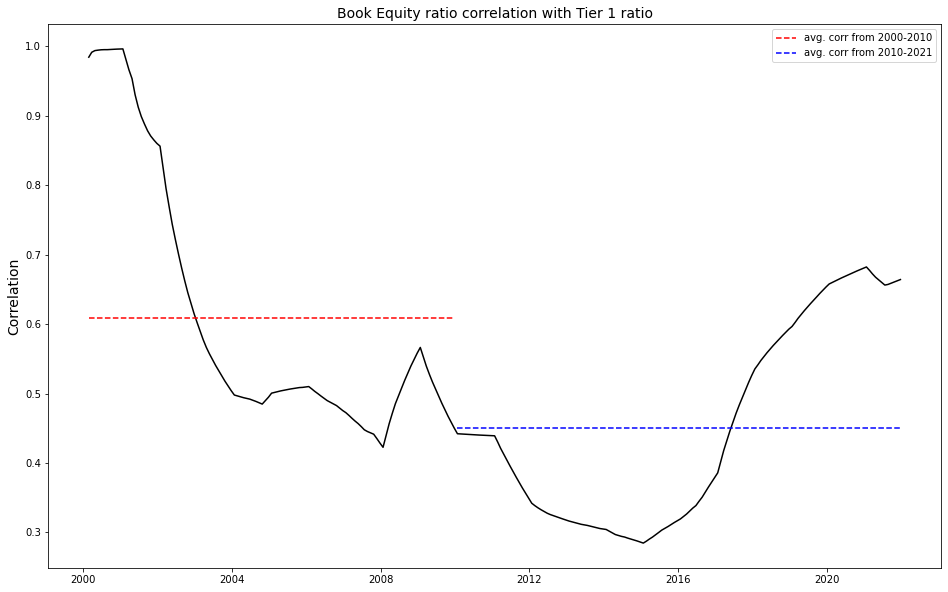

In [8]:
"""
Plotting the results
"""
fig, ax = plt.subplots(1, 1,figsize=(16,10))
ax.plot(ovall.iloc[13:,-3], color='black')
ax.plot(ovall.iloc[13:132,-2],linestyle='--',color='red', label='avg. corr from 2000-2010')
ax.plot(ovall.iloc[132:,-1],linestyle='--',color='blue', label='avg. corr from 2010-2021')
ax.set_ylabel('Correlation', fontsize=14)
ax.set_title('Book Equity ratio correlation with Tier 1 ratio', fontsize=14)
ax.legend();

## Calculate correlation Equity/RWA ratio & Tier 1/RWA ratio

In [9]:
"""
Calculating correlation between Book Equity/RWA ratio and Tier 1/RWA ratio. Expanding periode. Begins after 1 year
"""

ovall['corr2'] = np.full(len(ovall.index), np.nan)

for i in range(len(ovall.index)):
    if i < 13:
        pass
    else:
        ovall.iloc[i,-1] = ovall.iloc[:i,6].corr(ovall.iloc[:i,8])

In [10]:
"""
Add average values to the dataframe so we are able to plot it in the next cell
"""
ovall['avg002'] = ovall.iloc[13:132,-1].mean()
ovall['avg102'] = ovall.iloc[133:,-2].mean()

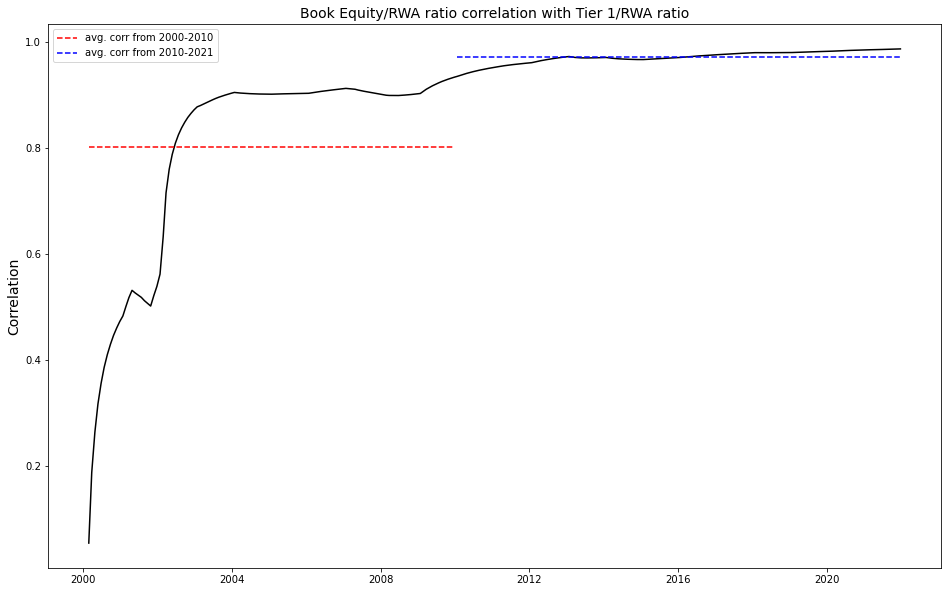

In [12]:
"""
Plotting the results
"""
fig, ax = plt.subplots(1, 1,figsize=(16,10))
ax.plot(ovall.iloc[13:,-3], color='black')
ax.plot(ovall.iloc[13:132,-2],linestyle='--',color='red', label='avg. corr from 2000-2010')
ax.plot(ovall.iloc[132:,-1],linestyle='--',color='blue', label='avg. corr from 2010-2021')
ax.set_ylabel('Correlation', fontsize=14)
ax.set_title('Book Equity/RWA ratio correlation with Tier 1/RWA ratio', fontsize=14)
ax.legend();